## Data visualization task

### Part 1 : Distributions
- The purpose is to do analysis of data distribution by identifying
    - Types of distributions
    - Values
    - Skewness
    - Outliers
    - Modalities

### Import libraries

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Configure defaults

In [2]:
options(repr.plot.width = 14, repr.plot.height = 7) # set plot size

### Load data

- The dataset consists of patients details with some of them having heart disease. There are 12 columns in the dataset namely
    - Age : age of the patient in years
    - Sex : sex of the patient (M: Male, F: Female)
    - ChestPainType : chest pain type (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)
    - RestingBP : resting blood pressure in mm Hg
    - Cholesterol : serum cholesterol in mm/dl
    - FastingBS : fasting blood sugar (1: if FastingBS > 120 mg/dl, 0: otherwise)
    - RestingECG : resting electrocardiogram results (Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria)
    - MaxHR : maximum heart rate achieved
    - ExerciseAngina: exercise-induced angina (Y: Yes, N: No)
    - Oldpeak: oldpeak measured in depression
    - ST_Slope: the slope of the peak exercise ST segment (Up: upsloping, Flat: flat, Down: downsloping)
    - HeartDisease: output class (1: heart disease, 0: Normal)

<!--     - age : age of patient in years
    - sex : gender of patient (1 = male, 0 = female)
    - cp : chest pain type
    - trestbps : resting blood pressure (in mm Hg on admission to the hospital)
    - chol : serum cholestoral in mg/dl
    -  -->

In [3]:
heart <- read.csv('~/Downloads/heart.csv')
head(heart)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>
1,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
2,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
4,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
5,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
6,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0


### Transform data

In [4]:
heart %>% 
mutate(
    HeartDisease = case_when(
        HeartDisease == 0 ~ 'No',
        HeartDisease == 1 ~ 'Yes'
    )
) %>% 
mutate_if(is.character, as.factor) -> heart

head(heart)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
,<int>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<int>,<fct>,<dbl>,<fct>,<fct>
1,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,No
2,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,Yes
3,37,M,ATA,130,283,0,ST,98,N,0.0,Up,No
4,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,Yes
5,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,No
6,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,No


### Visualization
#### Discrete distribution

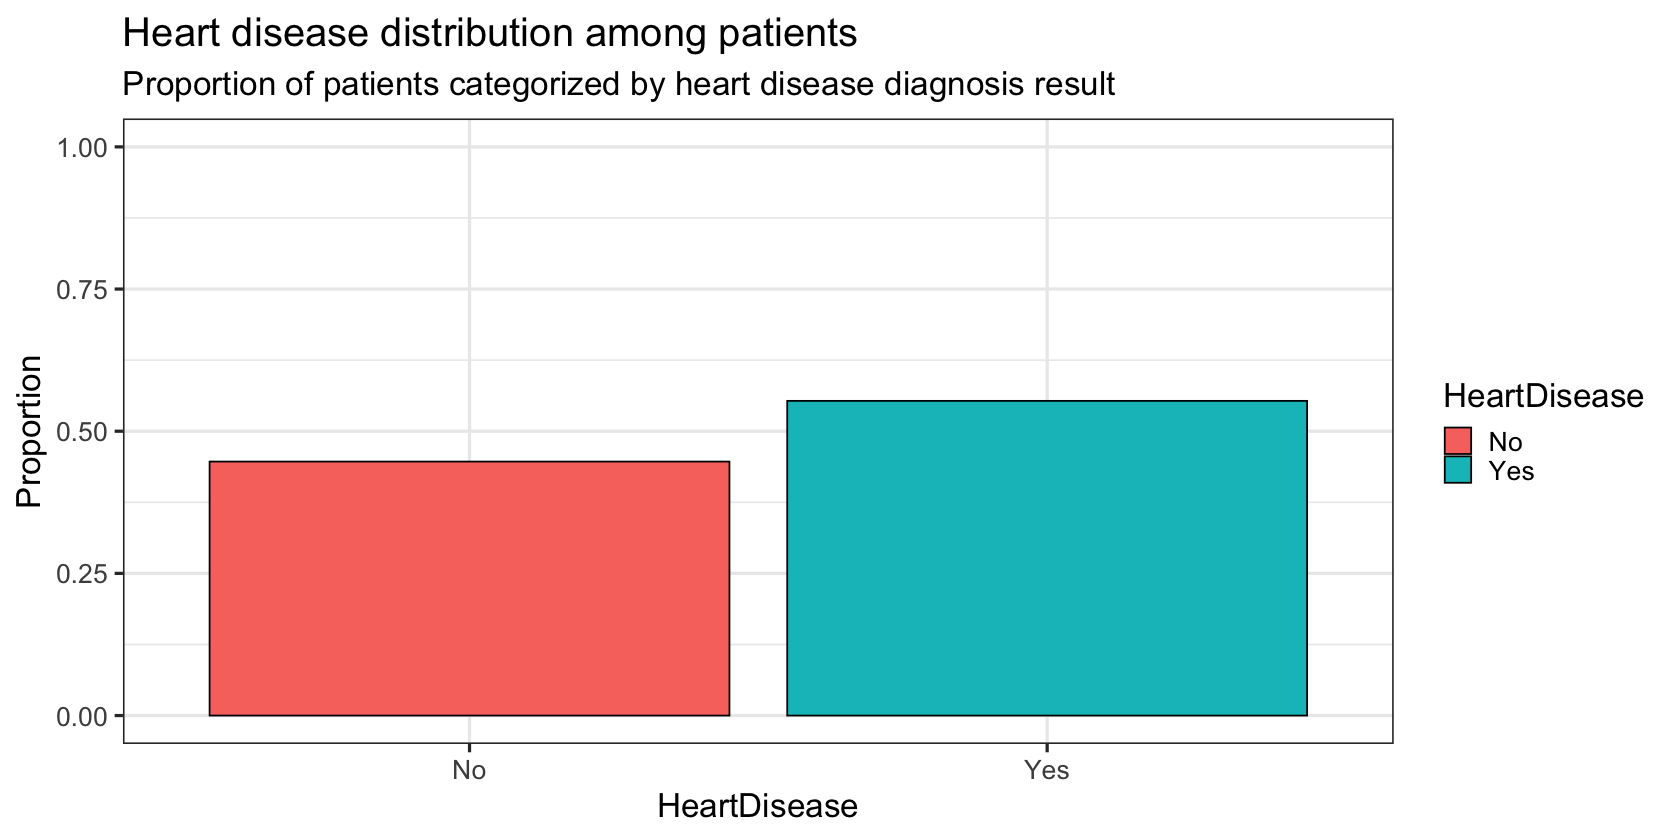

In [5]:
heart %>%
group_by(HeartDisease) %>%
summarise(n = n()) %>%
mutate(Proportion = n / sum(n)) %>%
ggplot(mapping = aes(x = HeartDisease, y = Proportion, fill = HeartDisease)) + 
geom_col(color = 'black') + 
ggtitle(
    'Heart disease distribution among patients',
    subtitle = 'Proportion of patients categorized by heart disease diagnosis result'
) +
ylim(0, 1) +
theme_bw(base_size = 20)

- The patients were diagonised as either having heart disease `(HeartDisease = Yes)` or not having heart disease `(HeartDisease = No)` which means there are 2 possible outcomes regarding to heart disease diagnosis
- If we randomly pick `n` patients (duplicate patients are allowed), probability of getting `k` patients with heart disease where `k <= n` follows `binomial distribution` because the probability of getting heart disease patient `(p)` which equals to `0.55` (from data) stays `constant` accross the picks
- however, if randomly pick `n` patients and did not allow a patient to be picked more than once, the probability of getting `k` patients with heart disease where `k <= n` follows `hypergeometric distribution` as the probability of getting heart disease patient `vary` accross the picks

#### Continuous distribution

In [6]:
heart %>% 
group_by(HeartDisease) %>% 
summarise(
    min = min(RestingBP),
    q1 = quantile(RestingBP, 0.25),
    mean = mean(RestingBP),
    median = median(RestingBP),
    q3 = quantile(RestingBP, 0.75),
    iqr = IQR(RestingBP),
    max = max(RestingBP),
) 

HeartDisease,min,q1,mean,median,q3,iqr,max
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
No,80,120,130.1805,130,140,20,190
Yes,0,120,134.1850,132,145,25,200


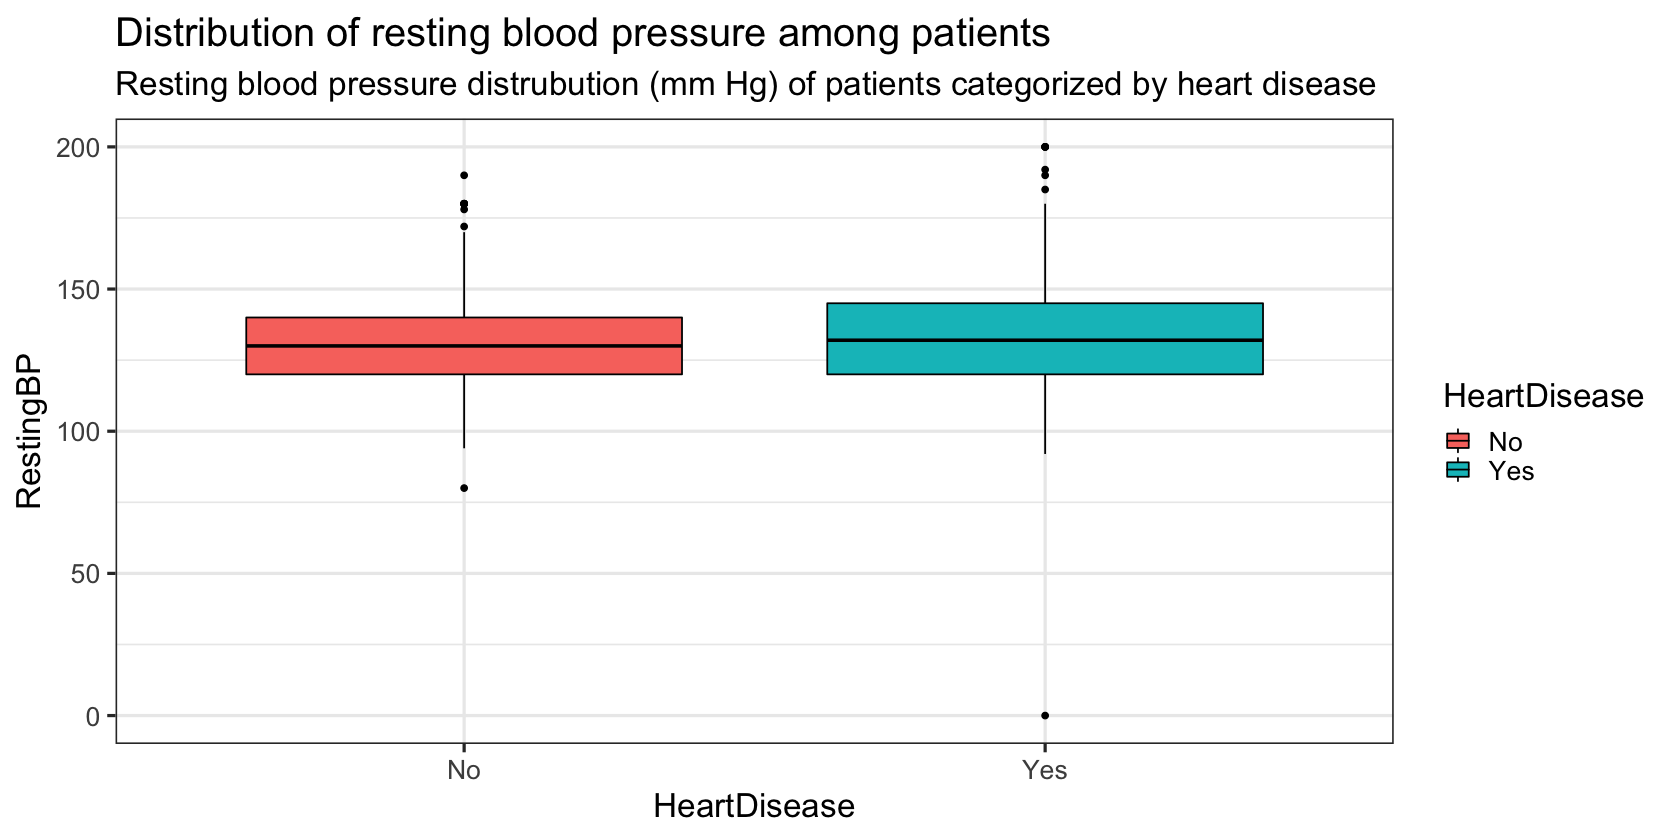

In [7]:
ggplot(heart, mapping = aes(x = HeartDisease, y = RestingBP, fill = HeartDisease)) + 
geom_boxplot(color = 'black') +
ggtitle(
    'Distribution of resting blood pressure among patients',
    subtitle = 'Resting blood pressure distrubution (mm Hg) of patients categorized by heart disease'
) +
theme_bw(base_size = 20)

**Observation**
- Resting blood pressure (RestingBP) variable has outliers (extreme values) in both upper and lower sides of box plot regardless of heart disease, where majority of the extreme resting blood pressure have high value
- It is clearer from box plot that the outliers on the lower end are merely minimum values of resting blood pressure observed for each diagnosis result group
- Minimum RestingBP for healty group is `80 mm Hg`. Surprisingly, heart disease patient group has the minimum resting blood pressure of `0 mm Hg` which looks unusual and could indicate error during data collection. The maximum RestingBP of both groups are not notably diffferent `(10 mm Hg)`. Additionally, the central portion of resting blood pressure for heart disease group is more spread out

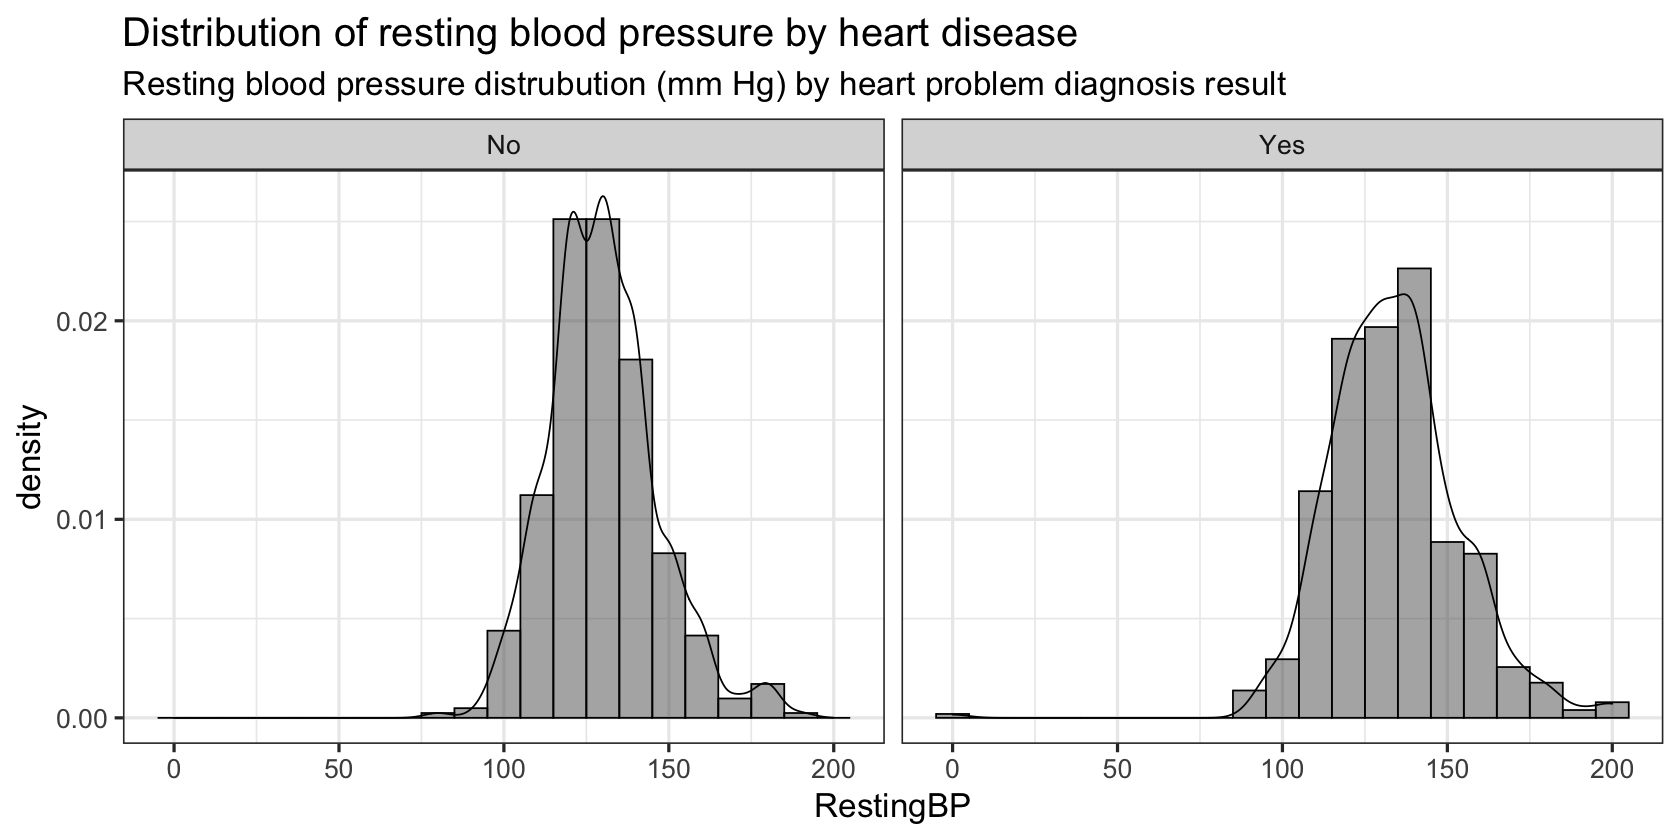

In [8]:
heart %>%
ggplot(mapping = aes(x = RestingBP)) + 
geom_histogram(aes(y = after_stat(density)), binwidth = 10,  color = 'black', alpha = 0.5) + 
geom_density() +
facet_wrap(. ~ HeartDisease) +
ggtitle(
    'Distribution of resting blood pressure by heart disease',
    subtitle = 'Resting blood pressure distrubution (mm Hg) by heart problem diagnosis result'
) +
theme_bw(base_size = 20)

**Observation**
- RestingBP variable is separated by heart disease and divided into intervals of width 10 mm Hg in order to form histogram and density plots
- From the plots after ignoring the outliers in resting blood pressure values,
    - the healthy group RestingBP distribution type is asymmetric right skewed and modality is bimodal (two modes or peaks)
    - the heart disease group RestingBP distribution type is asymmetric right skewed and modality is unimodal (single mode or peak)

In [ ]:
# heart %>% 
# mutate(
#     sex = case_when(
#         sex == 0 ~ 'female',
#         sex == 1 ~ 'male'
        
#     ),
#     fbs = fbs == 1,
#     exang = case_when(
#         exang == 1 ~ 'yes',
#         exang == 0 ~ 'no'
#     ),
#     target = case_when(
#         target == 1 ~ 'yes',
#         target == 0 ~ 'no'
#     ),
#     cp = as.factor(cp),
#     restecg = as.factor(restecg),
#     thal = as.factor(thal)
    
# ) %>%
# mutate_if(is.character, as.factor) %>%
# mutate_if(is.logical, as.factor) -> heart

# (max(heart$RestingBP) - min(heart$RestingBP)) / ceiling(sqrt(dim(heart)[1]))
# bw <- 2 * IQR(heart$RestingBP) / length(heart$RestingBP)^(1/3)
# bins <- ceiling((max(heart$RestingBP) - min(heart$RestingBP))/bw)
# bins <- ceiling(log2(length(heart$RestingBP))) + 1

# heart %>% 
# group_by(HeartDisease) %>% 
# summarise(
#     min = min(MaxHR),
#     Q1 = quantile(MaxHR, 0.25),
#     mean = mean(MaxHR),
#     median = median(MaxHR),
#     Q3 = quantile(MaxHR, 0.75),
#     IQR = IQR(MaxHR),
#     max = max(MaxHR)
# )

# ggplot(heart, mapping = aes(x = MaxHR)) + 
# geom_histogram(binwidth = 10, color = 'black', alpha = 0.5) + 
# facet_wrap(. ~ HeartDisease) +
# theme_bw(base_size = 20)

# heart %>%
# filter(HeartDisease == 'Yes') %>%
# ggplot(mapping = aes(x = MaxHR)) + 
# geom_histogram(aes(y = after_stat(density)), binwidth = 10,  color = 'black', alpha = 0.5, position = 'identity') + 
# theme_bw(base_size = 20)


# ggplot(heart, mapping = aes(x = Sex, fill = HeartDisease)) + 
# geom_bar(position = 'fill', color = 'black') + 
# ylab('Proportion') +
# ggtitle(
#     'Heart disease distribution among genders',
#     subtitle = 'Proportion of heart patients categorized by patient gender'
# ) +
# theme_bw(base_size = 20)


# heart %>%
# mutate(
#     isElderly = as.factor(
#         case_when(
#             Age >= 60 ~ 'Yes',
#             Age < 60 ~ 'No'
#         )
#     )
# ) %>%
# ggplot(mapping = aes(x = isElderly, fill = isElderly)) + 
# geom_bar(color = 'black') + 
# ylab('Count') +
# ggtitle(
#     'Elderly patient distribution',
#     subtitle = 'Distribution of patients categorized by age group'
# ) +
# theme_bw(base_size = 20)

# %>%
# gather(key = 'measure', value = 'value', 2:6) %>%
# mutate(measure = factor(measure, levels = levels)) %>%
# ggplot(mapping = aes(x = HeartDisease, y = value, fill = measure)) +
# scale_fill_brewer(palette = 'Blues') +
# geom_col(position = 'dodge') +
# theme_bw(base_size = 20)

# levels <- c('IQR', 'min', 'mean', 'median', 'max')

# - While RestingBP of heart disease group is insignificantly negativelyhealthy group seems to be have insignificant positive skewness, the resting blood pressure for

# **Observation**
# - According to [United Nations](https://en.wikipedia.org/wiki/Old_age#Definitions), Elderly can be defined as people having age 60 years old or more.
# - Answer to the question whether a person is elderly is 1 of the 2 possible values : Yes or No.
# - When we randomly pick a patient from dataset, it is equally likely that whether we get elderly patient or not. `S = {Elderly, Not Elderly}` thus, `P(Elderly) = 1/2` and `P(Not Elderly) = 1/2`
# - Likewise when we patients 5 times (duplicate patients allowed), P(Elderly) is the same for all of the n patients as the possible outcomes are the same. 
# - Let's say we are interested in picking elderly patients randomly; success = Elderly

# <!-- 
# - In the dataset, heart disease has been found in a quarter of female patients. On the contrary, proportion of males with heart disease exceeded 60 percent of the total male patients. -->